# In this script , I try to define a new meal definition based on what I did in [FEDPROTEINPRO](https://github.com/Htbibalan/FEDPROTEINPRO) and analysis the FEDPROTEIN experiment with this new approach, i.e. min pellet 1 pellet and snacks and mega meals included.  
# Here I will update the FED_function file to calculate more parameters of food intake such as snacks and mega meals

In [1]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_rows= 4000
pd.options.display.max_columns= 4000

In [20]:
%run ..//source/FED_FUNCTIONS_NEwMEAL.py

In [21]:
mice["FEDXB01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'pr_meal_size', 'pr_snack_size', 'pr_number_of_meals', 'pr_meal_frequency', 'pr_number_of_snacks', 'pr_snack_frequency', 'pr_hourly_meals', 'pr_mega_meal_count', 'pr_average_mega_meal_size', 'nr_meal_size', 'nr_snack_size', 'nr_number_of_meals', 'nr_meal_frequency', 'nr_number_of_snacks', 'nr_snack_frequency', 'nr_hourly_meals', 'nr_mega_meal_count', 'nr_average_mega_meal_size', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

In [22]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"} 

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


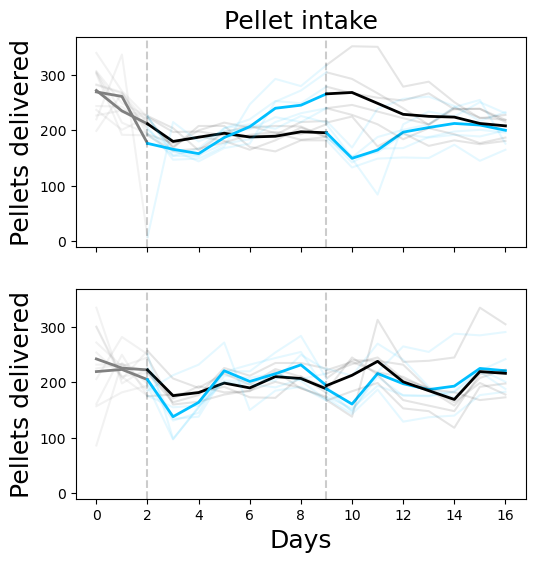

In [46]:
#plot shows timeline of total number of pellets delievered per day in NRPR and PRNR male and Females
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 18)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,6), gridspec_kw= {"left": 0.15})

timeline_multicolor_fig([nrpr_m, prnr_m], colors=["black", "deepskyblue"], ylabel="Pellets delivered", ax=ax[0])
timeline_multicolor_fig([nrpr_f, prnr_f], colors=["black", "deepskyblue"], ylabel="Pellets delivered", ax=ax[1])

ax[1].set_xlabel("Days", fontsize = 18)
ax[0].set_title("Pellet intake", fontsize = 18)
ax[1].set_ylim(ax[0].get_ylim())

figfolder = r"..//plots/NEW_MEAL_PLOTS//"

#f.savefig(figfolder + "timeline_pelletintake_blue.pdf")

In [27]:
mice["FEDXB01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'pr_meal_size', 'pr_snack_size', 'pr_number_of_meals', 'pr_meal_frequency', 'pr_number_of_snacks', 'pr_snack_frequency', 'pr_hourly_meals', 'pr_mega_meal_count', 'pr_average_mega_meal_size', 'nr_meal_size', 'nr_snack_size', 'nr_number_of_meals', 'nr_meal_frequency', 'nr_number_of_snacks', 'nr_snack_frequency', 'nr_hourly_meals', 'nr_mega_meal_count', 'nr_average_mega_meal_size', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


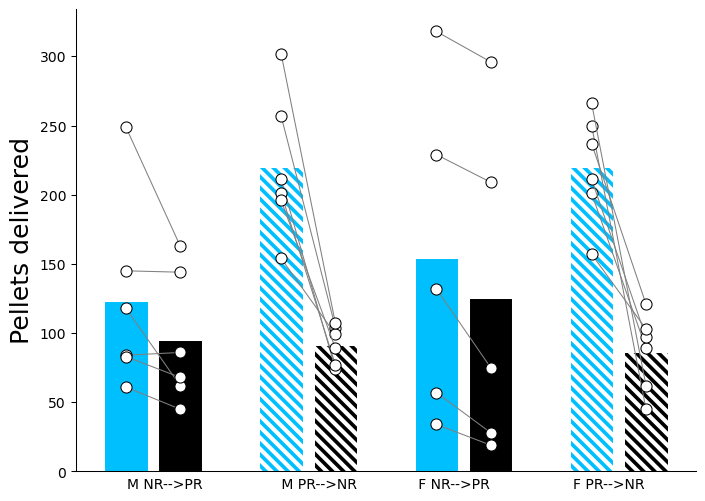

In [29]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_number_of_snacks", "nr_number_of_snacks"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_number_of_snacks","nr_number_of_snacks"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets delivered",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")


figfolder = r"..//plots/NEW_MEAL_PLOTS//"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


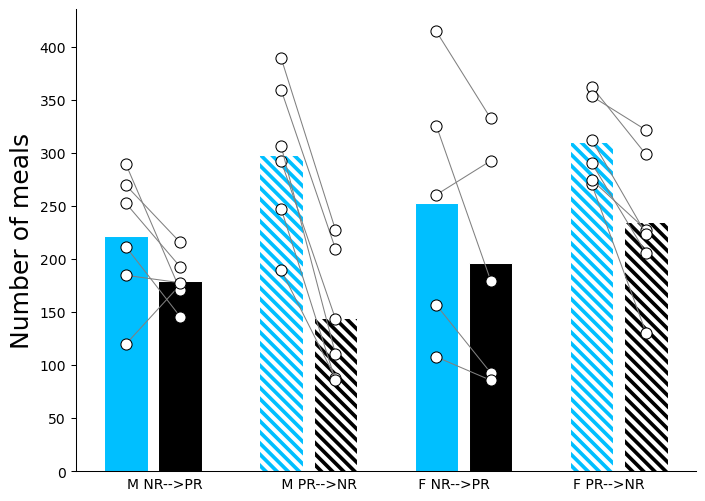

In [41]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_number_of_meals", "nr_number_of_meals"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_number_of_meals","nr_number_of_meals"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Number of meals",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")



figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


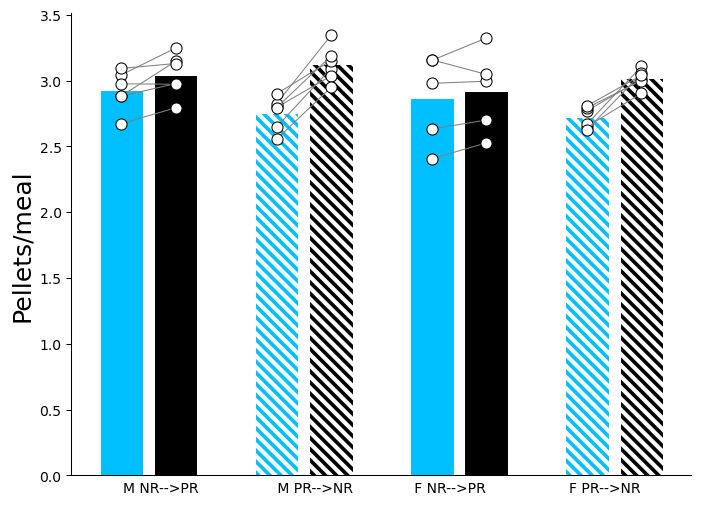

In [40]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets/meal",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")



figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


list

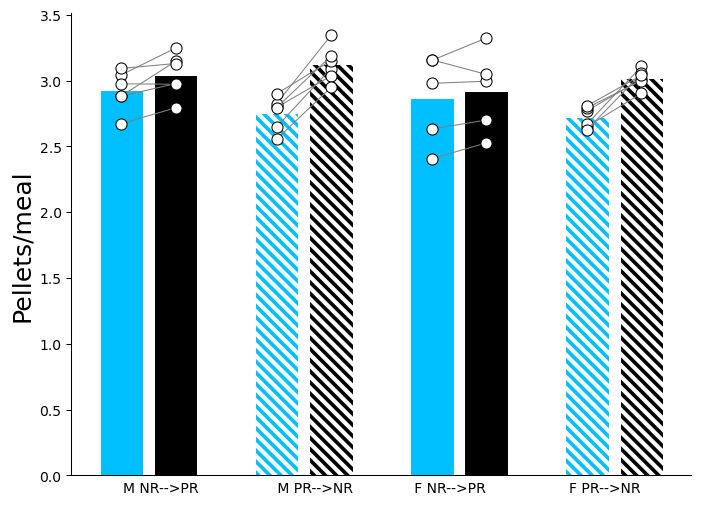

In [63]:
import numpy as np

#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black", "deepskyblue", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets/meal",fontsize = 18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")



figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
#f.savefig(figfolder + "pellets_delivered_blue.pdf")





6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


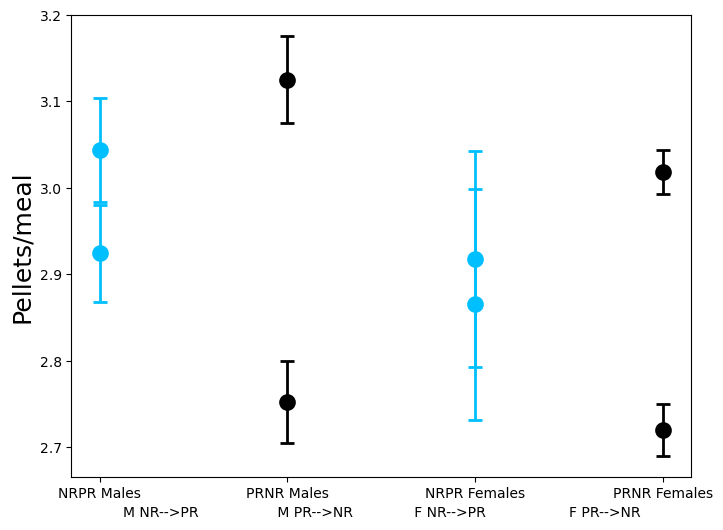

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming get_data_fields returns the data as a list or array
# Replace get_data_fields with your actual data extraction function

# Calculate means and standard errors (or standard deviations) for each group
def calculate_means_and_errors(data):
    means = [np.mean(sublist) for sublist in data]
    errors = [np.std(sublist) / np.sqrt(len(sublist)) for sublist in data]  # Standard error of the mean
    return means, errors

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Calculate means and errors for each group
nrpr_mean, nrpr_err = calculate_means_and_errors(nrpr_avg)
prnr_mean, prnr_err = calculate_means_and_errors(prnr_avg)
nrprf_mean, nrprf_err = calculate_means_and_errors(nrprf_avg)
prnrf_mean, prnrf_err = calculate_means_and_errors(prnrf_avg)

# Combine all data for easier plotting
means = [nrpr_mean, prnr_mean, nrprf_mean, prnrf_mean]
errors = [nrpr_err, prnr_err, nrprf_err, prnrf_err]
labels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"]
colors = ["deepskyblue", "black", "deepskyblue", "black"]

# Create the plot
f, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(labels))

# Plot error bars with markers
for i in range(len(means)):
    x_vals = np.array([i] * len(means[i]))  # Repeating the x position for all points in this group
    ax.errorbar(x_vals, means[i], yerr=errors[i], fmt='o', color=colors[i], capsize=5, markersize=10, elinewidth=2, markeredgewidth=2)

# Customizing the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Pellets/meal", fontsize=18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")

plt.show()

# Save the figure if needed
# figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
# f.savefig(figfolder + "pellets_error_bar_plot.pdf")



6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
NRPR Means: [2.9242535971908317, 3.0438627551589295]
NRPR Errors: [0.05574344200969818, 0.06046648761607069]
PRNR Means: [2.752363107543571, 3.1253698588230407]
PRNR Errors: [0.04735989362684833, 0.050682243820067016]
NRPRF Means: [2.865251365242328, 2.917766737367397]
NRPRF Errors: [0.13362972162550651, 0.12452777070081347]
PRNRF Means: [2.719961254927247, 3.0187894343447326]
PRNRF Errors: [0.029660082317596925, 0.025413599992975086]


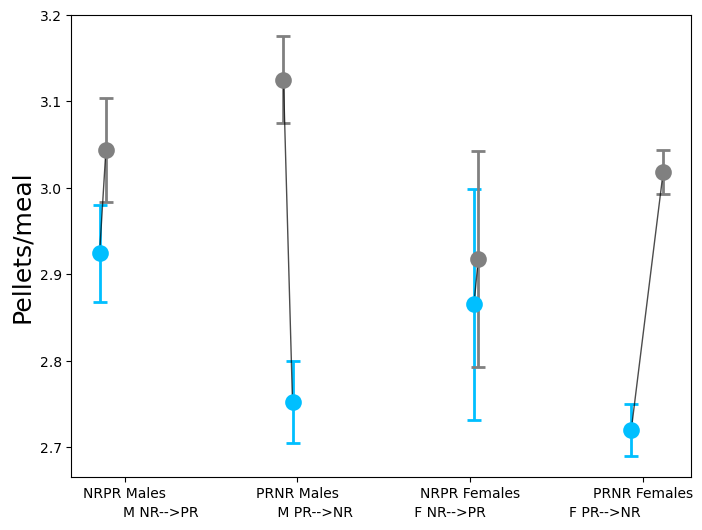

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate means and standard errors
def calculate_means_and_errors(data):
    means = [np.mean(sublist) for sublist in data]
    errors = [np.std(sublist) / np.sqrt(len(sublist)) for sublist in data]  # Standard error of the mean
    return means, errors

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Calculate means and errors for each group
nrpr_mean, nrpr_err = calculate_means_and_errors(nrpr_avg)
prnr_mean, prnr_err = calculate_means_and_errors(prnr_avg)
nrprf_mean, nrprf_err = calculate_means_and_errors(nrprf_avg)
prnrf_mean, prnrf_err = calculate_means_and_errors(prnrf_avg)

# Debugging step: print the means and errors to inspect them
print("NRPR Means:", nrpr_mean)
print("NRPR Errors:", nrpr_err)
print("PRNR Means:", prnr_mean)
print("PRNR Errors:", prnr_err)
print("NRPRF Means:", nrprf_mean)
print("NRPRF Errors:", nrprf_err)
print("PRNRF Means:", prnrf_mean)
print("PRNRF Errors:", prnrf_err)

# Combine all data for easier plotting
means = [nrpr_mean, prnr_mean, nrprf_mean, prnrf_mean]
errors = [nrpr_err, prnr_err, nrprf_err, prnrf_err]
labels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"]
colors = [["deepskyblue", "gray"], ["deepskyblue", "gray"], ["deepskyblue", "gray"], ["deepskyblue", "gray"]]

# Create the plot
f, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(labels))

# Plot error bars with markers and add more jitter
jitter_strength = 0.15  # Increased jitter strength
for i in range(len(means)):
    x_vals = np.array([i] * len(means[i]))  # Repeating the x position for all points in this group
    x_jittered = x_vals + np.random.uniform(-jitter_strength, jitter_strength, size=len(x_vals))  # Adding jitter
    for j in range(len(means[i])):
        ax.errorbar(x_jittered[j], means[i][j], yerr=errors[i][j], fmt='o', color=colors[i][j], capsize=5, markersize=10, elinewidth=2, markeredgewidth=2)
        
    # Connect relevant points with a line
    ax.plot(x_jittered, means[i], color='black', linestyle='-', linewidth=1, alpha=0.7)

# Customizing the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Pellets/meal", fontsize=18)
ax.set_xlabel("M NR-->PR                  M PR-->NR              F NR-->PR                   F PR-->NR")

plt.show()

# Save the figure if needed
# figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
# f.savefig(figfolder + "pellets_error_bar_plot_with_jitter_and_lines.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


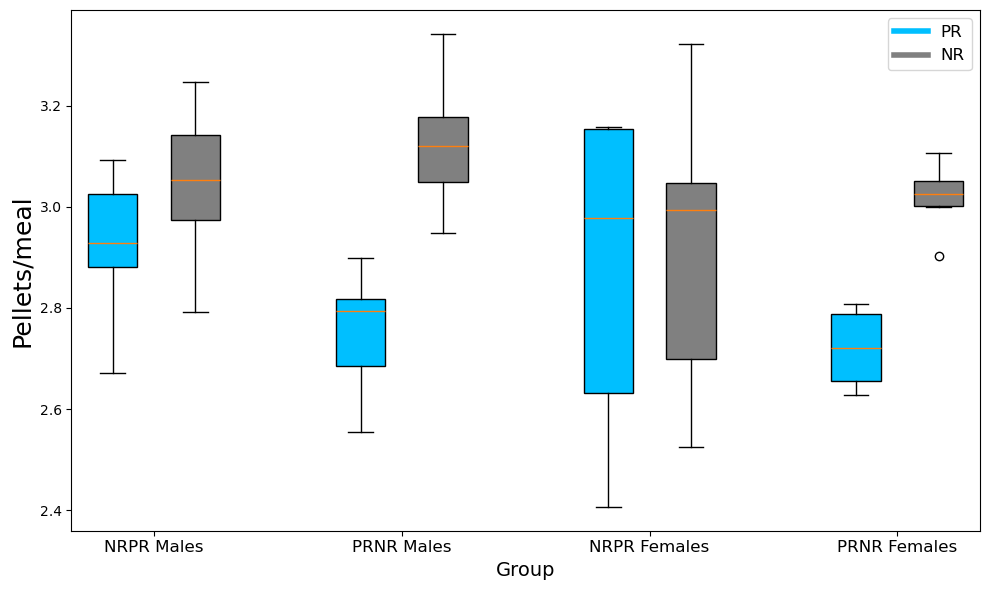

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"]

colors = ["deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray"]

# Create the plot
f, ax = plt.subplots(figsize=(10, 6))

# Create box plots with groupings
positions = [1, 2, 4, 5, 7, 8, 10, 11]
box = ax.boxplot(data, positions=positions, patch_artist=True, widths=0.6)

# Color the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adjust x-axis to group labels
ax.set_xticks([1.5, 4.5, 7.5, 10.5])
ax.set_xticklabels(group_labels, fontsize=12)

# Customizing the y-axis label
ax.set_ylabel("Pellets/meal", fontsize=18)
ax.set_xlabel("Group", fontsize=14)

# Add legend for colors
custom_lines = [plt.Line2D([0], [0], color='deepskyblue', lw=4),
                plt.Line2D([0], [0], color='gray', lw=4)]
ax.legend(custom_lines, ['PR', 'NR'], fontsize=12)

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
# f.savefig(figfolder + "pellets_box_plot_grouped.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


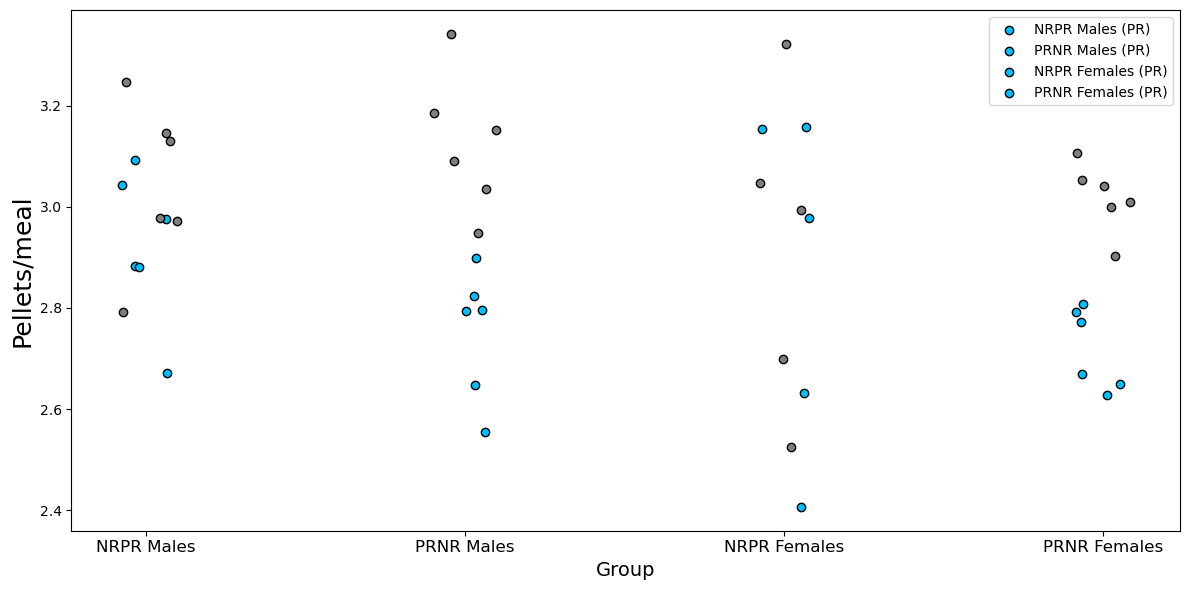

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NRPR Males (PR)", "NRPR Males (NR)", "PRNR Males (PR)", "PRNR Males (NR)",
                "NRPR Females (PR)", "NRPR Females (NR)", "PRNR Females (PR)", "PRNR Females (NR)"]

colors = ["deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the scatter plot with jitter
jitter_strength = 0.1  # Adjust jitter strength as needed
for i, (group_data, color) in enumerate(zip(data, colors)):
    x = np.full(len(group_data), i // 2)  # Place points at the correct x position
    x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=len(group_data))  # Apply jitter
    ax.scatter(x_jittered, group_data, color=color, label=group_labels[i] if i % 2 == 0 else "", edgecolor="black")

# Customize the plot
ax.set_xticks(range(len(group_labels) // 2))
ax.set_xticklabels(["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"], fontsize=12)
ax.set_ylabel("Pellets/meal", fontsize=18)
ax.set_xlabel("Group", fontsize=14)

# Add a legend
ax.legend(loc="best", fontsize=10)

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
# fig.savefig(figfolder + "pellets_scatter_plot_with_jitter.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


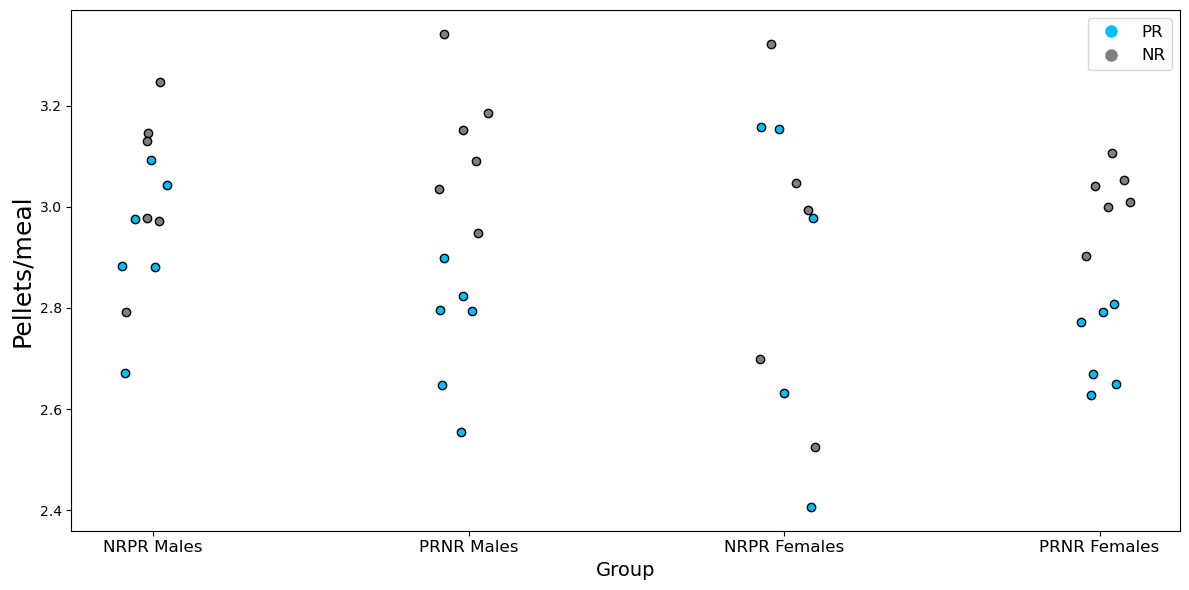

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NRPR Males (PR)", "NRPR Males (NR)", "PRNR Males (PR)", "PRNR Males (NR)",
                "NRPR Females (PR)", "NRPR Females (NR)", "PRNR Females (PR)", "PRNR Females (NR)"]

colors = ["deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray", "deepskyblue", "gray"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the scatter plot with jitter
jitter_strength = 0.1  # Adjust jitter strength as needed
for i, (group_data, color) in enumerate(zip(data, colors)):
    x = np.full(len(group_data), i // 2)  # Place points at the correct x position
    x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=len(group_data))  # Apply jitter
    ax.scatter(x_jittered, group_data, color=color, edgecolor="black")

# Customize the plot
ax.set_xticks(range(len(group_labels) // 2))
ax.set_xticklabels(["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"], fontsize=12)
ax.set_ylabel("Pellets/meal", fontsize=18)
ax.set_xlabel("Group", fontsize=14)

# Add a custom legend for PR and NR
custom_lines = [plt.Line2D([0], [0], color="deepskyblue", marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color="gray", marker='o', linestyle='', markersize=8, label='NR')]
ax.legend(handles=custom_lines, loc="best", fontsize=12)

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# figfolder = r"C:\Users\hta031\Github\FEDProtein\results\\"
# fig.savefig(figfolder + "pellets_scatter_plot_with_jitter_custom_legend.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


ValueError: '0PR PR' is not in list

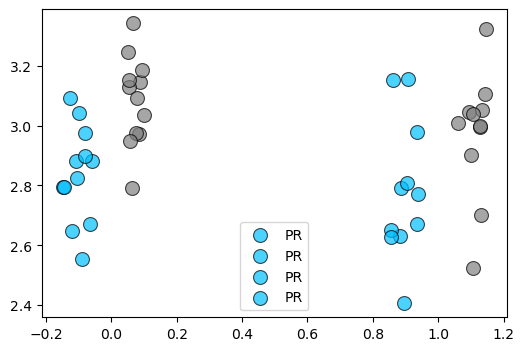

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NRPR Males (PR)", "NRPR Males (NR)", "PRNR Males (PR)", "PRNR Males (NR)",
                "NRPR Females (PR)", "NRPR Females (NR)", "PRNR Females (PR)", "PRNR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}
sex_mapping = {"M": 0, "F": 1}

# Define the mapping from group labels to sex and diet
group_mapping = {
    "NRPR Males (PR)": ("M", "PR"),
    "NRPR Males (NR)": ("M", "NR"),
    "PRNR Males (PR)": ("M", "PR"),
    "PRNR Males (NR)": ("M", "NR"),
    "NRPR Females (PR)": ("F", "PR"),
    "NRPR Females (NR)": ("F", "NR"),
    "PRNR Females (PR)": ("F", "PR"),
    "PRNR Females (NR)": ("F", "NR")
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the scatter plot with jitter
for i, group_label in enumerate(group_labels):
    sex, diet = group_mapping[group_label]
    jitter = np.random.uniform(-0.05, 0.05, size=len(data[i]))
    x_positions = [sex_mapping[sex] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=100, alpha=0.7, edgecolor="black", label=diet if i % 2 == 0 else "")

# Add median lines
medians = {}
for sex in ["M", "F"]:
    for diet in ["PR", "NR"]:
        group_key = f"{sex_mapping[sex]}_{diet}"
        medians[group_key] = np.median(data[group_labels.index(f"{sex_mapping[sex]}PR {diet}")])

for group_label in group_labels:
    sex, diet = group_mapping[group_label]
    median_value = np.median(data[group_labels.index(group_label)])
    x_val = sex_mapping[sex] + offset[diet]
    ax.plot([x_val - 0.05, x_val + 0.05], [median_value, median_value], color='k', linewidth=2, alpha=0.7)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = {"PR": "PR", "NR": "NR"}
updated_handles = [handles[labels.index("PR")], handles[labels.index("NR")]]
updated_labels = [legend_labels[label] for label in ["PR", "NR"]]

plt.legend(updated_handles, updated_labels, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.2, 0.5))

# Customize the plot aesthetics
plt.axhline(0.5, ls="--", color="red")  # Reference line at y=0.5
plt.xticks([0, 1], ["M", "F"])  # Set x-axis labels
plt.xlabel("Sex")
plt.ylabel("Pellets/meal")  # Replace y-axis label

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_styled.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


ValueError: 'NR' is not in list

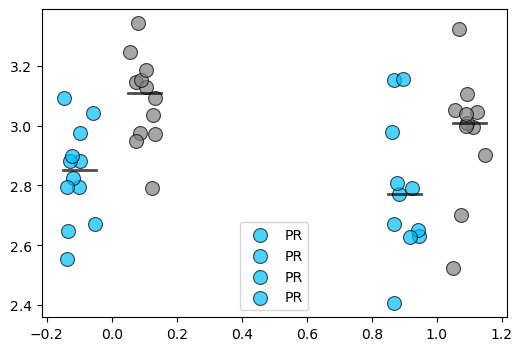

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NRPR Males (PR)", "NRPR Males (NR)", "PRNR Males (PR)", "PRNR Males (NR)",
                "NRPR Females (PR)", "NRPR Females (NR)", "PRNR Females (PR)", "PRNR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}
sex_mapping = {"M": 0, "F": 1}

# Define the mapping from group labels to sex and diet
group_mapping = {
    "NRPR Males (PR)": ("M", "PR"),
    "NRPR Males (NR)": ("M", "NR"),
    "PRNR Males (PR)": ("M", "PR"),
    "PRNR Males (NR)": ("M", "NR"),
    "NRPR Females (PR)": ("F", "PR"),
    "NRPR Females (NR)": ("F", "NR"),
    "PRNR Females (PR)": ("F", "PR"),
    "PRNR Females (NR)": ("F", "NR")
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the scatter plot with jitter
for i, group_label in enumerate(group_labels):
    sex, diet = group_mapping[group_label]
    jitter = np.random.uniform(-0.05, 0.05, size=len(data[i]))
    x_positions = [sex_mapping[sex] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=100, alpha=0.7, edgecolor="black", label=diet if i % 2 == 0 else "")

# Add median lines
for sex in ["M", "F"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            group_sex, group_diet = group_mapping[group_label]
            if group_sex == sex and group_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = sex_mapping[sex] + offset[diet]
        ax.plot([x_val - 0.05, x_val + 0.05], [median_value, median_value], color='k', linewidth=2, alpha=0.7)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = {"PR": "PR", "NR": "NR"}
updated_handles = [handles[labels.index("PR")], handles[labels.index("NR")]]
updated_labels = [legend_labels[label] for label in ["PR", "NR"]]

plt.legend(updated_handles, updated_labels, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.2, 0.5))

# Customize the plot aesthetics
plt.axhline(0.5, ls="--", color="red")  # Reference line at y=0.5
plt.xticks([0, 1], ["M", "F"])  # Set x-axis labels
plt.xlabel("Sex")
plt.ylabel("Pellets/meal")  # Replace y-axis label

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_styled.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


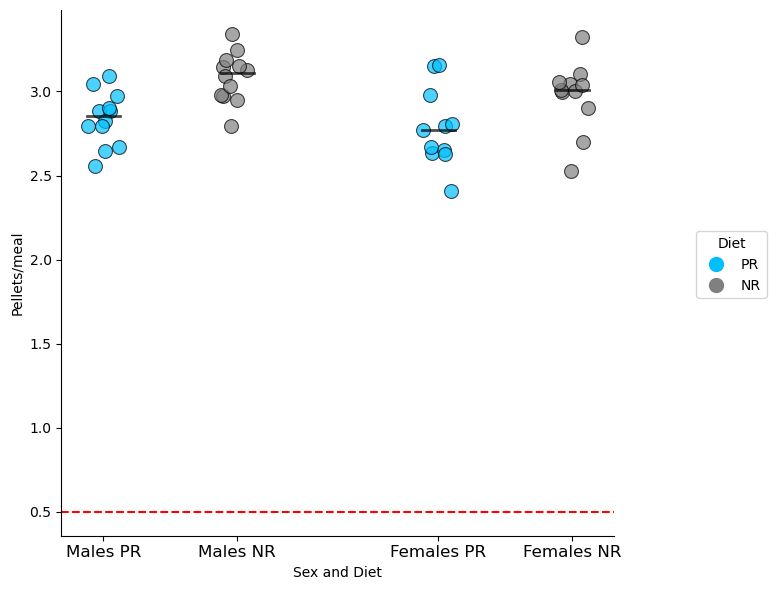

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NRPR Males (PR)", "NRPR Males (NR)", "PRNR Males (PR)", "PRNR Males (NR)",
                "NRPR Females (PR)", "NRPR Females (NR)", "PRNR Females (PR)", "PRNR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.2, "NR": 0.2}
sex_mapping = {"M": 0, "F": 1}

# Define the mapping from group labels to sex and diet
group_mapping = {
    "NRPR Males (PR)": ("M", "PR"),
    "NRPR Males (NR)": ("M", "NR"),
    "PRNR Males (PR)": ("M", "PR"),
    "PRNR Males (NR)": ("M", "NR"),
    "NRPR Females (PR)": ("F", "PR"),
    "NRPR Females (NR)": ("F", "NR"),
    "PRNR Females (PR)": ("F", "PR"),
    "PRNR Females (NR)": ("F", "NR")
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scatter plot with jitter
for i, group_label in enumerate(group_labels):
    sex, diet = group_mapping[group_label]
    jitter = np.random.uniform(-0.05, 0.05, size=len(data[i]))
    x_positions = [sex_mapping[sex] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=100, alpha=0.7, edgecolor="black")

# Add median lines
for sex in ["M", "F"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            group_sex, group_diet = group_mapping[group_label]
            if group_sex == sex and group_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = sex_mapping[sex] + offset[diet]
        ax.plot([x_val - 0.05, x_val + 0.05], [median_value, median_value], color='k', linewidth=2, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=10, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=10, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.2, 0.5))

# Customize the plot aesthetics
plt.axhline(0.5, ls="--", color="red")  # Reference line at y=0.5
plt.xticks([sex_mapping["M"] + offset["PR"], sex_mapping["M"] + offset["NR"], 
            sex_mapping["F"] + offset["PR"], sex_mapping["F"] + offset["NR"]], 
           ["Males PR", "Males NR", "Females PR", "Females NR"], fontsize=12)
plt.xlabel("Sex and Diet")
plt.ylabel("Pellets/meal")  # Replace y-axis label

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_styled.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


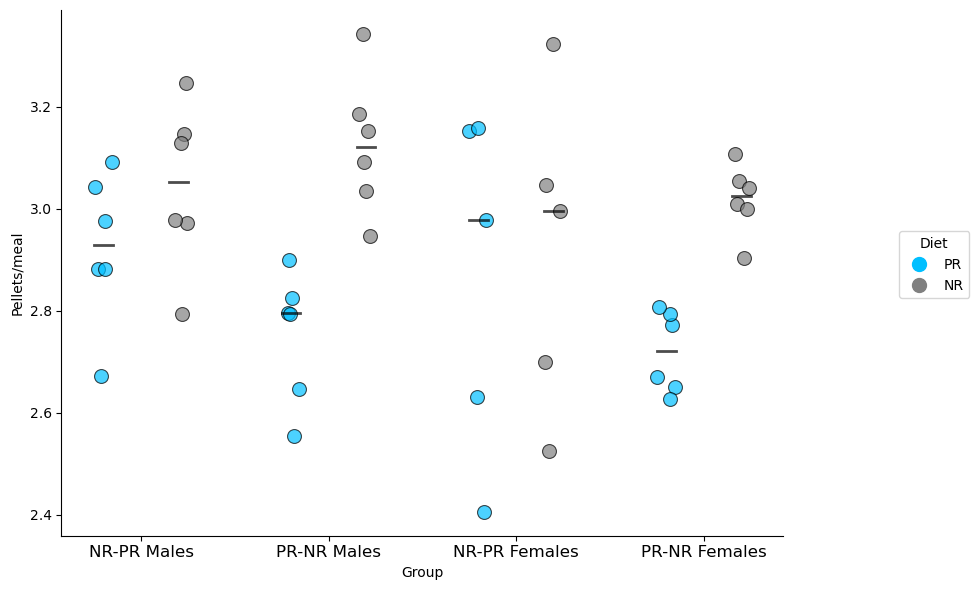

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.2, "NR": 0.2}
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot with jitter
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-0.05, 0.05, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=100, alpha=0.7, edgecolor="black")

# Add median lines
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.05, x_val + 0.05], [median_value, median_value], color='k', linewidth=2, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=10, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=10, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.2, 0.5))

# Customize the plot aesthetics
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=12)
plt.xlabel("Group")
plt.ylabel("Pellets/meal")  # Replace y-axis label

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_styled.pdf")


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


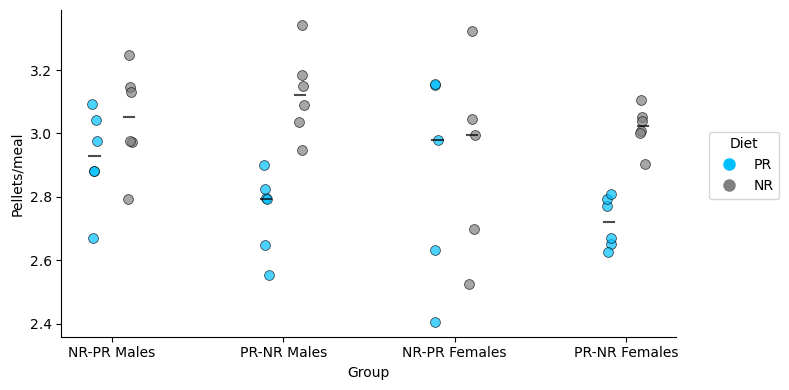

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extraction using your actual function
nrpr_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_meal_size", "nr_meal_size"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_meal_size","nr_meal_size"], prnr_female_selector)

# Combine all data for easier plotting
data = [nrpr_avg[0], nrpr_avg[1], prnr_avg[0], prnr_avg[1],
        nrprf_avg[0], nrprf_avg[1], prnrf_avg[0], prnrf_avg[1]]

group_labels = ["NR-PR Males (PR)", "NR-PR Males (NR)", "PR-NR Males (PR)", "PR-NR Males (NR)",
                "NR-PR Females (PR)", "NR-PR Females (NR)", "PR-NR Females (PR)", "PR-NR Females (NR)"]

colors = {"PR": "deepskyblue", "NR": "grey"}
offset = {"PR": -0.1, "NR": 0.1}  # Reduced offset for compactness
group_mapping = {
    "NR-PR Males (PR)": ("NR-PR Males", "PR"),
    "NR-PR Males (NR)": ("NR-PR Males", "NR"),
    "PR-NR Males (PR)": ("PR-NR Males", "PR"),
    "PR-NR Males (NR)": ("PR-NR Males", "NR"),
    "NR-PR Females (PR)": ("NR-PR Females", "PR"),
    "NR-PR Females (NR)": ("NR-PR Females", "NR"),
    "PR-NR Females (PR)": ("PR-NR Females", "PR"),
    "PR-NR Females (NR)": ("PR-NR Females", "NR")
}

group_positions = {
    "NR-PR Males": 0,
    "PR-NR Males": 1,
    "NR-PR Females": 2,
    "PR-NR Females": 3
}

# Create a figure and axis with smaller size for compactness
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the scatter plot with reduced jitter and smaller markers
jitter_strength = 0.02  # Reduced jitter for more compact spacing
for i, group_label in enumerate(group_labels):
    group, diet = group_mapping[group_label]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=len(data[i]))
    x_positions = [group_positions[group] + offset[diet] + jitter_val for jitter_val in jitter]
    sns.scatterplot(x=x_positions, y=data[i], color=colors[diet], s=50, alpha=0.7, edgecolor="black")  # Smaller markers

# Add median lines with slight adjustments for compactness
for group in ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"]:
    for diet in ["PR", "NR"]:
        relevant_data = []
        for group_label in group_labels:
            mapped_group, mapped_diet = group_mapping[group_label]
            if mapped_group == group and mapped_diet == diet:
                relevant_data.extend(data[group_labels.index(group_label)])
        median_value = np.median(relevant_data)
        x_val = group_positions[group] + offset[diet]
        ax.plot([x_val - 0.03, x_val + 0.03], [median_value, median_value], color='k', linewidth=1.5, alpha=0.7)

# Customize the legend by manually adding it
custom_lines = [plt.Line2D([0], [0], color=colors["PR"], marker='o', linestyle='', markersize=8, label='PR'),
                plt.Line2D([0], [0], color=colors["NR"], marker='o', linestyle='', markersize=8, label='NR')]
plt.legend(handles=custom_lines, title="Diet", loc="upper right", frameon=True, borderaxespad=-3, bbox_to_anchor=(1.1, 0.5))

# Customize the plot aesthetics with tighter spacing
plt.xticks([group_positions["NR-PR Males"], group_positions["PR-NR Males"],
            group_positions["NR-PR Females"], group_positions["PR-NR Females"]],
           ["NR-PR Males", "PR-NR Males", "NR-PR Females", "PR-NR Females"], fontsize=10)
plt.xlabel("Group")
plt.ylabel("Pellets/meal")

# Remove the background grid lines and spines
plt.grid(False)
sns.despine()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Save the figure if needed
# fig.savefig("pellets_scatter_plot_compact.pdf")
